In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.metrics import r2_score

In [4]:
from scipy.stats import zscore

In [5]:
headbrain = pd.read_csv('Downloads/headbrain.csv')

In [6]:
headbrain

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [7]:
headbrain.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [8]:
headbrain.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


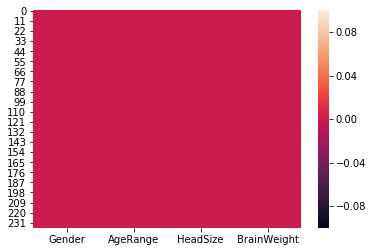

In [9]:
sns.heatmap(headbrain.isnull())

In [10]:
headbrain.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

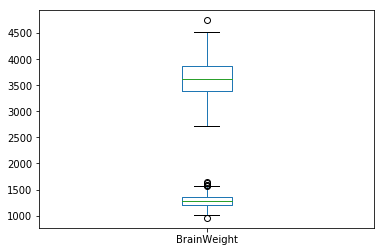

In [11]:
headbrain['HeadSize'].plot.box()
headbrain['BrainWeight'].plot.box()

In [12]:
headbrain['Gender'].astype('category')

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
207    2
208    2
209    2
210    2
211    2
212    2
213    2
214    2
215    2
216    2
217    2
218    2
219    2
220    2
221    2
222    2
223    2
224    2
225    2
226    2
227    2
228    2
229    2
230    2
231    2
232    2
233    2
234    2
235    2
236    2
Name: Gender, Length: 237, dtype: category
Categories (2, int64): [1, 2]

In [13]:
headbrain['AgeRange'].astype('category')

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
207    2
208    2
209    2
210    2
211    2
212    2
213    2
214    2
215    2
216    2
217    2
218    2
219    2
220    2
221    2
222    2
223    2
224    2
225    2
226    2
227    2
228    2
229    2
230    2
231    2
232    2
233    2
234    2
235    2
236    2
Name: AgeRange, Length: 237, dtype: category
Categories (2, int64): [1, 2]

In [14]:
headbrain.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [15]:
#headbrain['Gender'].replace([1,2],['M','F'],inplace = True)

In [16]:
#headbrain

In [17]:
#headbrain['Gender'].astype('category')

In [18]:
#headbrain.dtypes

Text(0, 0.5, 'HeadSize')

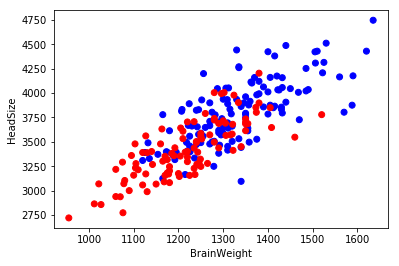

In [19]:
colors = {1:'blue',2:'red'}
plt.scatter(headbrain['BrainWeight'],headbrain['HeadSize'],c=headbrain['Gender'].apply(lambda x: colors[x]),marker="o")
plt.xlabel('BrainWeight')
plt.ylabel('HeadSize')

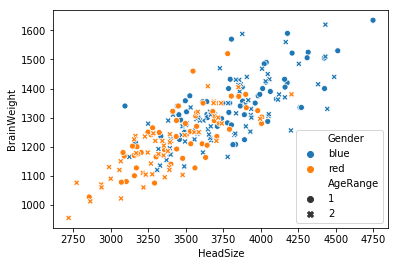

In [20]:
sns.scatterplot(x=headbrain['HeadSize'],y=headbrain['BrainWeight'],hue=headbrain['Gender'].apply(lambda x: colors[x]),style=headbrain['AgeRange'])

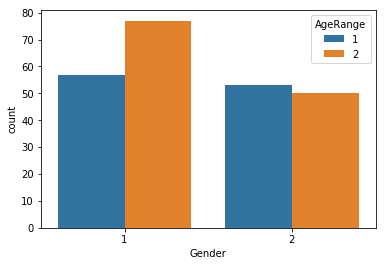

In [42]:
sns.countplot(x='Gender',data=headbrain,hue='AgeRange')

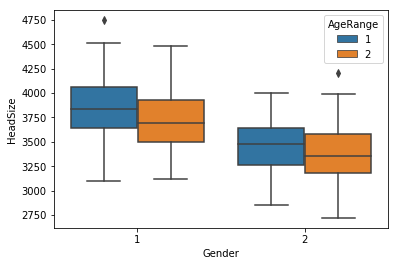

In [22]:
sns.boxplot(data=headbrain,hue='AgeRange',x='Gender',y='HeadSize')

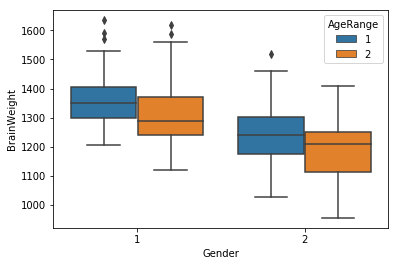

In [23]:
sns.boxplot(data=headbrain,hue='AgeRange',x='Gender',y='BrainWeight')

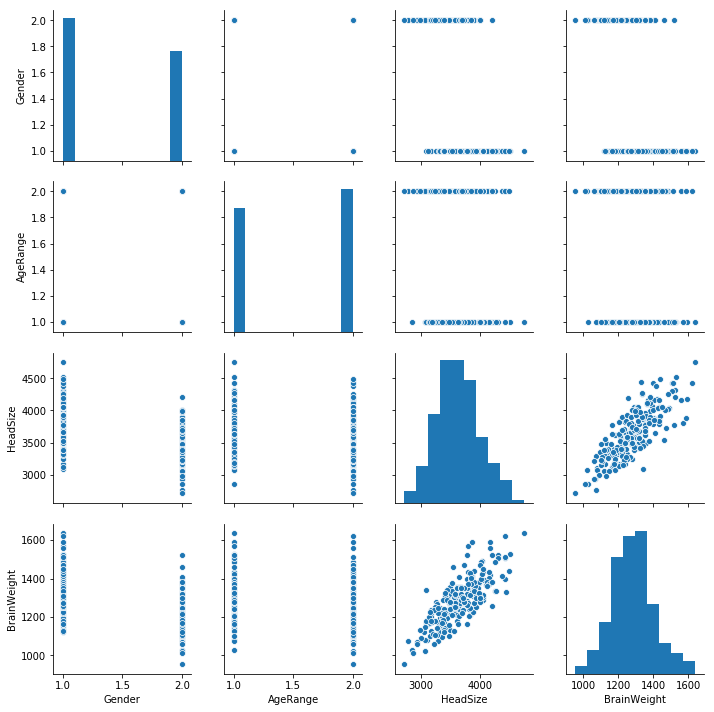

In [24]:
sns.pairplot(data=headbrain)

In [25]:
headbrain.corr()

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.088652,-0.514050,-0.465266
AgeRange,-0.088652,1.000000,-0.105428,-0.169438
HeadSize,-0.514050,-0.105428,1.000000,0.799570
BrainWeight,-0.465266,-0.169438,0.799570,1.000000


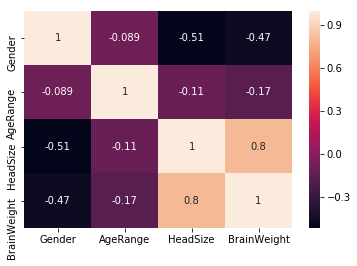

In [26]:
sns.heatmap(headbrain.corr(),annot=True)

In [27]:
# male data
headbrain[headbrain['Gender']==1].iloc[:,1:]

,AgeRange,HeadSize,BrainWeight
0,1,4512,1530
1,1,3738,1297
2,1,4261,1335
3,1,3777,1282
4,1,4177,1590
5,1,3585,1300
6,1,3785,1400
7,1,3559,1255
8,1,3613,1355
9,1,3982,1375


In [28]:
x= headbrain.iloc[:,:-1]

In [29]:
x.shape

(237, 3)

In [30]:
x

,Gender,AgeRange,HeadSize
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177
5,1,1,3585
6,1,1,3785
7,1,1,3559
8,1,1,3613
9,1,1,3982


In [31]:
y = headbrain.iloc[:,-1]

In [32]:
y.min()

955

In [33]:
y.mean()

1282.873417721519

In [34]:
y.max()

1635

In [35]:
y.shape

(237,)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=16)

In [38]:
x_test.shape

(48, 3)

In [39]:
y_test.shape

(48,)

In [40]:
liner_model  = LinearRegression()

In [43]:
liner_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
liner_model.coef_

array([-26.99780691, -25.49459835,   0.23722673])

In [45]:
liner_model.intercept_

498.6084923958331

In [46]:
liner_model.score(x_train,y_train)

0.6211566658038747

In [47]:
predictn  = liner_model.predict(x_test)

In [48]:
#predictn

In [49]:
mean_squared_error(y_test,predictn)

2562.2640051132385

In [50]:
r2_score(y_test,predictn)

0.7958056800103123

In [51]:
num = range(0,101)

In [52]:
def randomStateSelecter(randNum):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=randNum)
    liner_model  = LinearRegression()
    liner_model.fit(x_train,y_train)
    #print(liner_model.coef_)
    #print(liner_model.intercept_)
    #print(liner_model.score(x_train,y_train))
    predictn  = liner_model.predict(x_test)
    s =r2_score(y_test,predictn)
    if(0.75 < s ):
        print("=====> "+str(randNum))
        print(mean_squared_error(y_test,predictn))
        print(r2_score(y_test,predictn))
for a in range(0,101):
    randomStateSelecter(a)

=====> 3
5099.394528402538
0.7517443602859216
=====> 5
3586.0176818268496
0.7767424819420251
=====> 10
3249.781153439102
0.8157823234601044
=====> 16
2562.2640051132385
0.7958056800103123
=====> 25
3405.7070528157233
0.7928363477654895
=====> 26
3749.3857366316292
0.7593482613336838
=====> 50
3351.3055061275754
0.7869409544679555
=====> 91
2592.6571603652687
0.7553213677205194


In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
score = cross_val_score(liner_model,x,y,cv=5)
score

array([0.34259963, 0.48902643, 0.60951512, 0.42038487, 0.66643136])

In [55]:
score.mean()

0.5055914843895714

In [56]:
np.sqrt(r2_score(y_test,predictn))

0.8920794135111023

In [57]:
z= np.abs(zscore(headbrain))

In [58]:
df = headbrain[(z<3).all(axis=1)]

In [59]:
df.shape

(236, 4)

In [ ]:
#there is only one outlier in this case ..